In [1]:
import pandas as pd

# Load the dataset
file_path = 'Regression_BSD_hour(1).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [2]:
missing_values = data.isnull().sum()

cnt_distribution = data['cnt'].describe()

missing_values, cnt_distribution


(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 count    17379.000000
 mean       189.463088
 std        181.387599
 min          1.000000
 25%         40.000000
 50%        142.000000
 75%        281.000000
 max        977.000000
 Name: cnt, dtype: float64)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Features and target variable
X = data.drop(['instant', 'dteday', 'casual', 'registered', 'cnt'], axis=1)
y = data['cnt']

# Identifying numerical and categorical columns
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed']
categorical_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Creating a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data and transform the test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_preprocessed.shape, X_test_preprocessed.shape


((13903, 61), (3476, 61))

In [7]:
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.models import Sequential


# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

X_train_preprocessed_dense = X_train_preprocessed.toarray()
X_test_preprocessed_dense = X_test_preprocessed.toarray()

history = model.fit(X_train_preprocessed_dense, y_train, validation_split=0.2, epochs=100, batch_size=32)

test_loss, test_mae = model.evaluate(X_test_preprocessed_dense, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


Epoch 1/100


2024-03-06 10:54:12.010222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


348/348 [==============================] - ETA: 0s - loss: 38897.2695 - mae: 135.7346

2024-03-06 10:54:14.274380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


348/348 [==============================] - 3s 6ms/step - loss: 38897.2695 - mae: 135.7346 - val_loss: 17791.7461 - val_mae: 95.3461
Epoch 2/100
348/348 [==============================] - 2s 6ms/step - loss: 13525.0430 - mae: 84.8332 - val_loss: 11719.0107 - val_mae: 80.4599
Epoch 3/100
348/348 [==============================] - 2s 6ms/step - loss: 11047.6104 - mae: 78.3590 - val_loss: 12363.2061 - val_mae: 83.6365
Epoch 4/100
348/348 [==============================] - 2s 6ms/step - loss: 11415.0791 - mae: 79.9112 - val_loss: 12304.1182 - val_mae: 83.9547
Epoch 5/100
348/348 [==============================] - 2s 6ms/step - loss: 11299.4824 - mae: 79.0117 - val_loss: 12107.6592 - val_mae: 83.0546
Epoch 6/100
348/348 [==============================] - 2s 6ms/step - loss: 11051.8711 - mae: 78.0681 - val_loss: 11685.6719 - val_mae: 81.3352
Epoch 7/100
348/348 [==============================] - 2s 7ms/step - loss: 10835.4541 - mae: 77.2142 - val_loss: 11569.7812 - val_mae: 79.5086
Epoch 8/10

KeyboardInterrupt: 

Load data
[[-1.54083688 -1.62031134 -0.3994488  ...  0.          0.
   0.        ]
 [ 0.1171121   0.13822833 -1.07374273 ...  0.          0.
   0.        ]
 [-0.19375333 -0.12584281  1.93464557 ...  0.          1.
   0.        ]
 ...
 [ 1.56781745  1.45742327 -1.02187397 ...  0.          0.
   0.        ]
 [-1.33359326 -1.62031134  0.11923884 ...  0.          0.
   0.        ]
 [ 0.1171121   0.13822833  1.05287659 ...  1.          0.
   0.        ]] [[ 1.56781745  1.2815693  -1.85177419 ...  0.          0.
   0.        ]
 [-1.33359326 -1.44445738 -1.1256115  ...  0.          0.
   0.        ]
 [-0.91910601 -1.00511265  0.1711076  ...  0.          0.
   0.        ]
 ...
 [-1.54083688 -1.70852852 -0.19197375 ...  1.          0.
   0.        ]
 [-0.09013152 -0.03762564  0.741664   ...  0.          0.
   0.        ]
 [-0.91910601 -0.91689548 -0.71066138 ...  0.          0.
   0.        ]]
Build the model
Model: "sequential_18"
_______________________________________________________________

2024-03-06 11:45:19.259901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


348/348 [==============================] - ETA: 0s - loss: 37111.5273 - mae: 133.9088 - rmse: 184.8723

2024-03-06 11:45:21.542824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


348/348 [==============================] - 3s 7ms/step - loss: 37111.5273 - mae: 133.9088 - rmse: 184.8723 - val_loss: 17881.2598 - val_mae: 98.0976 - val_rmse: 131.3700 - lr: 0.0010
Epoch 2/100
348/348 [==============================] - 2s 7ms/step - loss: 14210.7500 - mae: 87.8656 - rmse: 117.1516 - val_loss: 12450.7705 - val_mae: 85.0263 - val_rmse: 110.1525 - lr: 0.0010
Epoch 3/100
348/348 [==============================] - 2s 7ms/step - loss: 11739.5889 - mae: 82.3969 - rmse: 107.1132 - val_loss: 12415.0469 - val_mae: 85.5434 - val_rmse: 110.2113 - lr: 0.0010
Epoch 4/100
348/348 [==============================] - 2s 7ms/step - loss: 11788.3066 - mae: 83.2000 - rmse: 107.4107 - val_loss: 12332.2451 - val_mae: 85.9670 - val_rmse: 109.9064 - lr: 0.0010
Epoch 5/100
348/348 [==============================] - 2s 7ms/step - loss: 11510.0410 - mae: 82.5395 - rmse: 105.9885 - val_loss: 11880.5010 - val_mae: 84.6553 - val_rmse: 107.8432 - lr: 0.0010
Epoch 6/100
348/348 [====================

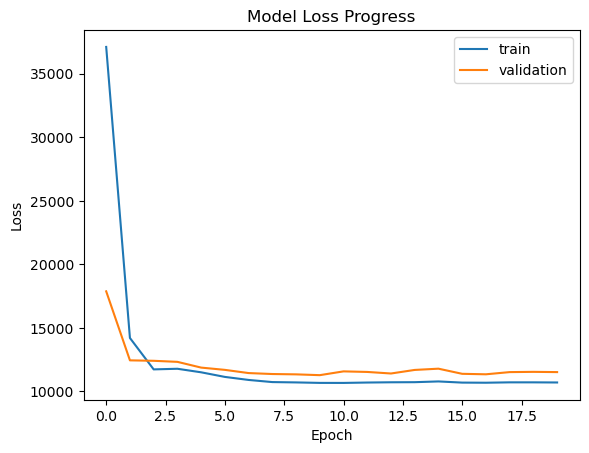

Evaluate model
109/109 [==============================] - 0s 4ms/step - loss: 10576.9160 - mae: 77.2761 - rmse: 101.5319
Test Loss: 10576.916015625, Test MAE: 77.276123046875, Test RMSE: 101.53185272216797


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard
import keras.backend as K
from keras.regularizers import l1_l2



def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def load_and_preprocess_data(filepath):
    data = pd.read_csv(filepath)

    X = data.drop(['instant', 'dteday', 'casual', 'registered', 'cnt'], axis=1)
    y = data['cnt']
    
    numerical_cols = ['temp', 'atemp', 'hum', 'windspeed']
    categorical_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
    
    # Creating a preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(), categorical_cols)
        ]
    )
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)
    
    X_train_preprocessed = X_train_preprocessed.toarray()
    X_test_preprocessed = X_test_preprocessed.toarray()

    print(X_train_preprocessed, X_test_preprocessed)
    
    return X_train_preprocessed, X_test_preprocessed, y_train, y_test


# def build_model(input_shape):
#     model = Sequential()
#     model.add(Dense(128, activation='relu', input_shape=(input_shape,)))
#     # model.add(Dense(128, activation='relu', input_shape=(input_shape,), kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))

#     model.add(BatchNormalization())
#     model.add(Dropout(0.3))
    
#     # model.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
#     model.add(Dense(128, activation='relu'))

#     model.add(BatchNormalization())
#     model.add(Dropout(0.3))

#     model.add(Dense(64, activation='relu'))    
#     # model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.2))

#     model.add(Dense(32, activation='relu'))    
#     # model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.1))
    
#     model.add(Dense(1)) 
    
#     optimizer = Adam(learning_rate=0.001)
#     model.compile(optimizer=optimizer, loss='mse', metrics=['mae', rmse])

def build_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    
    optimizer = Adam(learning_rate=0.001)
    # Include RMSE in the metrics
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae', rmse])
    
    return model


    
    return model
def plot_history(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title('Model Loss Progress')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

def main():
    print("Load data")
    filepath = 'Regression_BSD_hour(1).csv'  # Update this path
    X_train, X_test, y_train, y_test = load_and_preprocess_data(filepath)
    
    print("Build the model")
    model = build_model(X_train.shape[1])
    print(model.summary())
    
    print("Training the model") 
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001, verbose=1)
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping, reduce_lr], batch_size=32, verbose=1)
    
    print("Plot the model")
    plot_history(history)
    
    print("Evaluate model")
    test_loss, test_mae, test_rmse = model.evaluate(X_test, y_test, verbose=1)
    print(f'Test Loss: {test_loss}, Test MAE: {test_mae}, Test RMSE: {test_rmse}')


if __name__ == '__main__':
    main()
